# Analyze the NYC Taxi Data
Queries databasees from "taxi_data" http://localhost:50070/explorer.html#/user/local/temp/taxi_data (FDFS)
with tables : trips, pefer, licenses

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

In [2]:
from hdfs3 import HDFileSystem
hdfs = HDFileSystem(host='localhost', port=9000);
print(hdfs.ls("/user/local/temp/taxi_data"))

['/user/local/temp/taxi_data/data_for_1week', '/user/local/temp/taxi_data/data_for_2days', '/user/local/temp/taxi_data/vehicle_data']


In [10]:
with hdfs.open('/user/local/temp/taxi_data/data_for_1week/trip_data_week1.csv') as twk:
     trips_week = pd.read_csv(twk)

In [4]:
with hdfs.open('/user/local/temp/taxi_data/data_for_1week/fare_data_week1.csv') as fwk:
     fare_week = pd.read_csv(fwk)

In [5]:
with hdfs.open('/user/local/temp/taxi_data/data_for_2days/trips_sunday.csv') as tsd:
     trips_sunday = pd.read_csv(tsd)

In [6]:
with hdfs.open('/user/local/temp/taxi_data/data_for_2days/trips_wednesday.csv') as twd:
     trips_wednesday = pd.read_csv(twd)

In [7]:
with hdfs.open('/user/local/temp/taxi_data/data_for_2days/fares_sunday.csv') as fsd:
     fare_sunday = pd.read_csv(fsd)

In [8]:
with hdfs.open('/user/local/temp/taxi_data/data_for_2days/fares_wednesday.csv') as fwd:
     fare_wednesday = pd.read_csv(fwd)

In [9]:
with hdfs.open('/user/local/temp/taxi_data/vehicle_data/licenses.csv') as lcs:
     licenses = pd.read_csv(lcs)

In [105]:
trips_week.head(5)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,AA70234AB7643A84903E4B0705352D8A,2A3BEA5321E55025D86D65269A67DDD7,VTS,2,NaN,2013-08-05 23:07:00,2013-08-05 23:07:00,3,0,0.00,0.000000,0.000000,0.000000,0.000000
1,E28E2AD14EF5E6D4E3019702A243E982,D99683EBE31E9B9B26A5A04570E1F7F8,VTS,1,NaN,2013-08-05 10:37:00,2013-08-05 10:47:00,2,600,5.64,-73.789703,40.641075,-73.729752,40.677792
2,1AF573B78F7BEAFF25E721041D80D2D2,F4AEEE8C03292EF4BE4C3E0BC4FF66EE,VTS,1,NaN,2013-08-06 01:05:00,2013-08-06 01:27:00,6,1320,6.54,0.000000,0.000000,0.000000,0.000000
3,942EDD26C4E3337133058C095AD23289,CA0BCAF81499737B35644B5F9AB19CCC,VTS,2,NaN,2013-08-05 23:09:00,2013-08-05 23:10:00,1,60,0.00,-73.776718,40.645199,-73.776718,40.645199
4,6BA29E9A69B10F218C1509BEDD7410C2,4FE29988ED28B24418058814A371F326,VTS,1,NaN,2013-08-07 08:35:00,2013-08-07 08:43:00,6,480,1.57,-73.955681,40.779476,-73.969414,40.762016


In [107]:
fare_week.head(5)

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,AA70234AB7643A84903E4B0705352D8A,2A3BEA5321E55025D86D65269A67DDD7,VTS,2013-08-05 23:07:00,CRD,52.0,0.0,0.5,10.4,0.0,62.9
1,E28E2AD14EF5E6D4E3019702A243E982,D99683EBE31E9B9B26A5A04570E1F7F8,VTS,2013-08-05 10:37:00,CSH,17.5,0.0,0.5,0.0,0.0,18.0
2,1AF573B78F7BEAFF25E721041D80D2D2,F4AEEE8C03292EF4BE4C3E0BC4FF66EE,VTS,2013-08-06 01:05:00,CRD,21.5,0.5,0.5,4.4,0.0,26.9
3,942EDD26C4E3337133058C095AD23289,CA0BCAF81499737B35644B5F9AB19CCC,VTS,2013-08-05 23:09:00,CSH,52.0,0.0,0.5,0.0,0.0,52.5
4,6BA29E9A69B10F218C1509BEDD7410C2,4FE29988ED28B24418058814A371F326,VTS,2013-08-07 08:35:00,CSH,8.0,0.0,0.5,0.0,0.0,8.5


In [109]:
trips_sunday.head(5)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4B37DE7600AEF9C61F784B05FDEEE0E9,1D7E4CD01ED1C7A6E662A2A9A4B7153F,CMT,1,N,2013-08-04 00:03:59,2013-08-04 00:12:46,2,527,1.3,-74.008743,40.738098,-73.992302,40.743961
1,EEC9C6596BD11B4F213367BEF164ED40,902B96BCB437D747BA50888778132BE4,CMT,1,N,2013-08-04 00:16:29,2013-08-04 00:21:41,1,311,1.2,-73.955505,40.776752,-73.942024,40.786846
2,B009310787A68502FFD50A2F9CB5CE26,A44307E7C864D631E9A26B49C25DD23B,CMT,1,N,2013-08-04 00:11:00,2013-08-04 00:21:57,1,656,4.3,-73.993073,40.698143,-73.979675,40.657543
3,A408F138216DE3E432BBF2FD88665A88,82EA6A085709BE93AA9DA363A85A04FF,CMT,1,N,2013-08-04 00:04:26,2013-08-04 00:18:27,1,840,3.2,-73.954834,40.765484,-73.999046,40.760777
4,C46A099283B423340CD9CC2837E73761,4339B58CF42D6B3011479B8D9731CA7F,CMT,1,N,2013-08-04 00:09:55,2013-08-04 00:18:53,1,538,1.0,-73.988869,40.723156,-74.001343,40.731052


In [111]:
trips_wednesday.head(5)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,6BA29E9A69B10F218C1509BEDD7410C2,4FE29988ED28B24418058814A371F326,VTS,1,NaN,2013-08-07 08:35:00,2013-08-07 08:43:00,6,480,1.57,-73.955681,40.779476,-73.969414,40.762016
1,CBBE30BB243B09EADA18DAFB28035441,22457AF4EC023E0E8BBF351791A5C811,VTS,1,NaN,2013-08-07 08:41:00,2013-08-07 08:52:00,1,660,1.93,-73.998047,40.725616,-74.003555,40.742741
2,39EBD6484D03EF51127B8B7D6A14C172,5509A943094052ED58D903C69F3DCD9C,VTS,1,NaN,2013-08-07 08:48:00,2013-08-07 08:50:00,6,120,0.53,-73.984123,40.743126,-73.988693,40.737148
3,FCFFBC6FFBA23178D9C569CAE435020F,A39C4955A7F7B10AC4F27130DD752B19,VTS,1,NaN,2013-08-07 08:40:00,2013-08-07 08:52:00,1,720,2.77,-73.990112,40.740761,-74.014198,40.715439
4,925FAAB0AEC05317DCD15C9EA48B26B3,52DF74CF19155D44C87E64FF9E715F43,VTS,2,NaN,2013-08-07 08:08:00,2013-08-07 08:52:00,1,2640,19.01,-73.786743,40.644646,-73.959900,40.809681


In [113]:
fare_sunday.head(5)

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,4B37DE7600AEF9C61F784B05FDEEE0E9,1D7E4CD01ED1C7A6E662A2A9A4B7153F,CMT,2013-08-04 00:03:59,CRD,7.5,0.5,0.5,2.10,0.0,10.60
1,EEC9C6596BD11B4F213367BEF164ED40,902B96BCB437D747BA50888778132BE4,CMT,2013-08-04 00:16:29,CRD,6.5,0.5,0.5,1.87,0.0,9.37
2,B009310787A68502FFD50A2F9CB5CE26,A44307E7C864D631E9A26B49C25DD23B,CMT,2013-08-04 00:11:00,CRD,14.5,0.5,0.5,3.00,0.0,18.50
3,A408F138216DE3E432BBF2FD88665A88,82EA6A085709BE93AA9DA363A85A04FF,CMT,2013-08-04 00:04:26,CRD,12.5,0.5,0.5,3.37,0.0,16.87
4,C46A099283B423340CD9CC2837E73761,4339B58CF42D6B3011479B8D9731CA7F,CMT,2013-08-04 00:09:55,CRD,7.5,0.5,0.5,1.50,0.0,10.00


In [117]:
fare_wednesday.head(5)

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,6BA29E9A69B10F218C1509BEDD7410C2,4FE29988ED28B24418058814A371F326,VTS,2013-08-07 08:35:00,CSH,8.0,0.0,0.5,0.00,0.00,8.5
1,CBBE30BB243B09EADA18DAFB28035441,22457AF4EC023E0E8BBF351791A5C811,VTS,2013-08-07 08:41:00,CRD,9.5,0.0,0.5,1.90,0.00,11.9
2,39EBD6484D03EF51127B8B7D6A14C172,5509A943094052ED58D903C69F3DCD9C,VTS,2013-08-07 08:48:00,CSH,4.0,0.0,0.5,0.00,0.00,4.5
3,FCFFBC6FFBA23178D9C569CAE435020F,A39C4955A7F7B10AC4F27130DD752B19,VTS,2013-08-07 08:40:00,CRD,11.5,0.0,0.5,1.50,0.00,13.5
4,925FAAB0AEC05317DCD15C9EA48B26B3,52DF74CF19155D44C87E64FF9E715F43,VTS,2013-08-07 08:08:00,CRD,52.0,0.0,0.5,12.17,5.33,70.0


In [11]:
licenses.head(5)

,medallion,name,types,current_status,DMV_license_plate,vehicle_VIN_number,vehicle_type,model_year,medallion_type,agent_number,agent_name,agent_telephone_number,agent_website,agent_address,last_updated_date,last_updated_time
0,D7479C954DF136B1545CBF8491361A8D,"TORRES,HAROLD",MEDALLION,CUR,3T50A,2FAFP70W26X156009,CNG,2006,OWNER MUST DRIVE,1,TIRU CABS,(718)937-2550,NaN,10 METROTECH NEW YORK NY,1/31/2015,13:20
1,F9FA751DAECA69F0AF703177916A29F8,"BELIARD,LECLERC",MEDALLION,CUR,3D30A,3VWPL7AJ3BM637581,DSE,2011,NAMED DRIVER,1,TIRU CABS,(718)937-1122,NaN,10 METROTECH NEW YORK NY,1/31/2015,13:20
2,D2842D4D37F17851610C2991B8B3B164,"ST.SURIN, HENRY CLAUDE",MEDALLION,CUR,4A52A,3VWPL7AJ4BM637329,DSE,2011,NAMED DRIVER,1,TIRU CABS,(718)937-1123,NaN,10 METROTECH NEW YORK NY,1/31/2015,13:20
3,9383E6D0EB4524BBC576072BFBE2E053,"PIERRE, GERALD",MEDALLION,CUR,8C72A,3VWPL7AJ1BM691252,DSE,2011,OWNER MUST DRIVE,1,TIRU CABS,(718)937-2551,NaN,10 METROTECH NEW YORK NY,1/31/2015,13:20
4,160248D54674DD1633EC5CE7896215E8,"KANG,SUNG,CHOON",MEDALLION,CUR,5C61A,JTEBW3EH1A2041875,HYB,2010,NAMED DRIVER,1,TIRU CABS,(718)937-1124,NaN,10 METROTECH NEW YORK NY,1/31/2015,13:20


### 1. Task 3.1

In [18]:
df_tf = pd.merge(trips_sunday, fare_sunday, how='inner', on = ['medallion', 'hack_license', 'vendor_id', 'pickup_datetime'])

In [79]:
df_tf.head(5)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,4B37DE7600AEF9C61F784B05FDEEE0E9,1D7E4CD01ED1C7A6E662A2A9A4B7153F,CMT,1,N,2013-08-04 00:03:59,2013-08-04 00:12:46,2,527,1.3,...,40.738098,-73.992302,40.743961,CRD,7.5,0.5,0.5,2.10,0.0,10.60
1,EEC9C6596BD11B4F213367BEF164ED40,902B96BCB437D747BA50888778132BE4,CMT,1,N,2013-08-04 00:16:29,2013-08-04 00:21:41,1,311,1.2,...,40.776752,-73.942024,40.786846,CRD,6.5,0.5,0.5,1.87,0.0,9.37
2,B009310787A68502FFD50A2F9CB5CE26,A44307E7C864D631E9A26B49C25DD23B,CMT,1,N,2013-08-04 00:11:00,2013-08-04 00:21:57,1,656,4.3,...,40.698143,-73.979675,40.657543,CRD,14.5,0.5,0.5,3.00,0.0,18.50
3,A408F138216DE3E432BBF2FD88665A88,82EA6A085709BE93AA9DA363A85A04FF,CMT,1,N,2013-08-04 00:04:26,2013-08-04 00:18:27,1,840,3.2,...,40.765484,-73.999046,40.760777,CRD,12.5,0.5,0.5,3.37,0.0,16.87
4,C46A099283B423340CD9CC2837E73761,4339B58CF42D6B3011479B8D9731CA7F,CMT,1,N,2013-08-04 00:09:55,2013-08-04 00:18:53,1,538,1.0,...,40.723156,-74.001343,40.731052,CRD,7.5,0.5,0.5,1.50,0.0,10.00


In [32]:
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202310 entries, 0 to 202309
Data columns (total 21 columns):
medallion             202310 non-null object
hack_license          202310 non-null object
vendor_id             202310 non-null object
rate_code             202310 non-null int64
store_and_fwd_flag    202307 non-null object
pickup_datetime       202310 non-null datetime64[ns]
dropoff_datetime      202310 non-null datetime64[ns]
passenger_count       202310 non-null int64
trip_time_in_secs     202310 non-null int64
trip_distance         202310 non-null float64
pickup_longitude      202310 non-null float64
pickup_latitude       202310 non-null float64
dropoff_longitude     202310 non-null float64
dropoff_latitude      202310 non-null float64
payment_type          202310 non-null object
fare_amount           202310 non-null float64
surcharge             202310 non-null float64
mta_tax               202310 non-null float64
tip_amount            202310 non-null float64
tolls_amount

In [33]:
df_tf['pickup_datetime'] = pd.to_datetime(df_tf['pickup_datetime'])
df_tf['dropoff_datetime'] = pd.to_datetime(df_tf['dropoff_datetime'])

In [35]:
pd.pivot_table(df_tf,index=['medallion', 'hack_license', 'vendor_id', 'pickup_datetime'])

dropoff_latitude  \
medallion                        hack_license                     vendor_id pickup_datetime                         
00005007A9F30E289E760362F69E4EAD 39C3E34B3E338A7210C1D3163E6E9589 CMT       2013-08-04 08:51:35         40.754883   
                                                                            2013-08-04 09:07:21         40.753345   
                                                                            2013-08-04 10:02:10         40.749336   
                                                                            2013-08-04 10:23:14         40.730885   
                                                                            2013-08-04 10:47:56         40.750774   
                                                                            2013-08-04 10:53:34         40.758595   
                                                                            2013-08-04 11:10:55         40.762283   
                                                                            2013-08-04 11:20:35         40.749146   
                                                                            2013-08-04 11:38:53         40.723923   
                                                                            2013-08-04 11:52:58         40.744389   
                                                                            2013-08-04 12:12:06         40.752487   
                                                                            2013-08-04 12:18:28         40.781666   
                                                                            2013-08-04 12:31:01         40.767654   
                                                                            2013-08-04 12:40:23         40.782059   
                                                                            2013-08-04 12:50:57         40.743484   
                                                                            2013-08-04 13:07:01         40.729847   
                                                                            2013-08-04 13:23:02         40.641884   
                                                                            2013-08-04 14:08:08         40.681118   
                                                                            2013-08-04 15:06:02         40.789295   
                                                                            2013-08-04 16:06:05         40.778309   
                                                                            2013-08-04 16:18:38         40.789665   
                                                                            2013-08-04 16:32:03         40.780712   
                                                                            2013-08-04 16:37:33         40.775311   
                                                                            2013-08-04 16:52:12         40.779270   
                                                                            2013-08-04 17:04:42         40.757843   
                                                                            2013-08-04 17:21:45         40.774597   
                                 CC05618EFA21B1EF07D8337B2F488858 CMT       2013-08-04 00:15:09         40.736656   
                                                                            2013-08-04 00:38:30         40.729015   
                                                                            2013-08-04 00:50:54         40.748920   
                                                                            2013-08-04 01:07:22         40.735775   
...                                                                                                           ...   
FFF9D2834D24079962E68642F14BAC82 07B9E4A30EF82BD07FBBA7C48A93C67B CMT       2013-08-04 10:50:59         40.745552   
                                                                            2013-08-04 11:09:34         40.761440   
  

<Figure size 7200x4320 with 0 Axes>

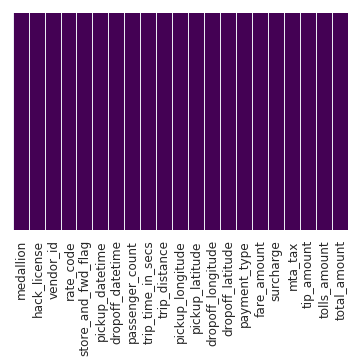

<Figure size 7200x4320 with 0 Axes>

In [74]:
## Missig Data heatmap

sns.heatmap(df_tf.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.10)
plt.figure(figsize=(100, 60))

# Task 2.1
Find the distribution of fare amounts (fare_amount), i.e., for each amount A, the number of trips that cost A.
Output: A key-value pair per line, where the key is the amount, and the value is the number of trips.
The output directory produced by Hadoop should be named FareAmounts.

In [94]:
task2a = df_tf.groupby('fare_amount')['medallion'].count().to_frame('count').sort_values(['count'], ascending=[False])
task2a.head()

,count
fare_amount,
7.0,9867
6.0,9788
6.5,9788
5.5,9522
7.5,9473


Text(0, 0.5, 'Number trips')

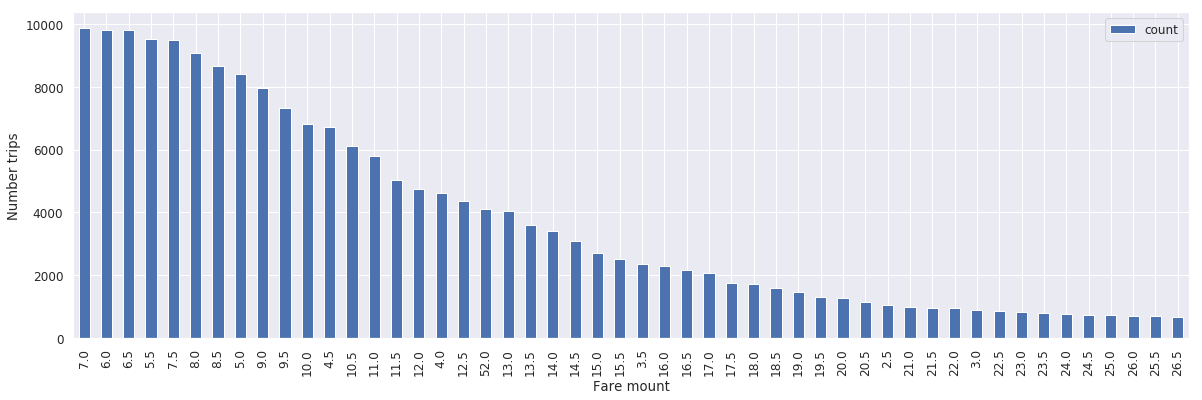

In [103]:
fare_plot = task2a.head(50).plot(kind="bar", figsize=(20, 6))
fare_plot.set_xlabel("Fare mount")
fare_plot.set_ylabel("Number trips")

# Task 2.2
Find the number of trips that cost less or equal than $10 (total_amount).
Output: The number of trips.
The output directory produced by Hadoop should be named TripAmount.

In [110]:
task2b = df_tf[df_tf.fare_amount <= 10]['medallion'].count()
task2b

112487

# Task 2.3
Find the distribution of the number of passengers, i.e., for each number of passengers A, the number of trips that had A passengers.
Output: A key-value pair per line, where the key is the number of passengers, and the value is the number of trips.
The output directory produced by Hadoop should be named NumberPassengers.

In [114]:
task2c = df_tf.groupby('passenger_count')['medallion'].count().to_frame('count').sort_values(['count'], ascending=[False])
task2c.head(10)

,count
passenger_count,
1,147159
2,36394
3,11488
4,7103
5,159
0,4
6,3


Text(21.200000000000017, 0.5, 'Count')

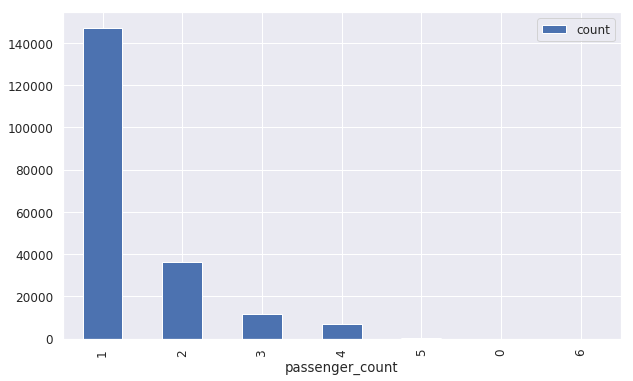

In [115]:
task2c.plot(kind="bar", figsize=(10, 6))
fare_plot.set_xlabel("Passenger count")
fare_plot.set_ylabel("Count")

# Task 2.4
Find the total revenue (for all taxis) per day (from pickup_datetime). The revenue should include the fare amount, tips, tolls, surcharges.
Output: A key-value pair per line, where the key is the day (YYYY-MM-DD), and the value is the fare amount, surcharges, tips and tolls, in this order.
The values in the output must have a precision of two decimal digits, e.g., 3.02245 should be represented as 3.02.
The output directory produced by Hadoop should be named TotalRevenue.

In [134]:
task3d = df_tf.groupby([df_tf.pickup_datetime.dt.date, df_tf.medallion])[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].sum().sort_values(['total_amount'], ascending=[False])
task3d.head(10)

fare_amount  tip_amount  \
pickup_datetime medallion                                                   
2013-08-04      E523F84E85708BCEB9FEB6F7825C0E08       9482.1       45.40   
                054A68E668620D92C8C515A797A7F899        543.0       65.20   
                469F250223E3C6B213079BDC116DA38A       1093.5       99.42   
                82799F5364DF8D04616858FBBA43473F        868.0       60.92   
                2E65E3402C21D8BBF2E067A1621AAAD8        858.5       70.04   
                E00BE6255EC5B08B4DB77D0945EDEEF5        914.5       57.60   
                BCE59CF7BF7FC3BCAF75E0DA610454AE        825.0      100.44   
                98A1FE3855455AF12BC72F7B38AA9ADE        847.5       87.87   
                9D477B85710F82025A3BE177C4B17C0C        803.0      106.11   
                2FB3A27D66685E122EFD33C147FB49FE        849.5       68.70   

                                                  tolls_amount  total_amount  
pickup_datetime medallion                                                     
2013-08-04      E523F84E85708BCEB9FEB6F7825C0E08          0.00       9564.05  
                054A68E668620D92C8C515A797A7F899        948.32       1571.02  
                469F250223E3C6B213079BDC116DA38A          0.00       1221.92  
                82799F5364DF8D04616858FBBA43473F         63.96       1013.38  
                2E65E3402C21D8BBF2E067A1621AAAD8         36.90       1011.44  
                E00BE6255EC5B08B4DB77D0945EDEEF5          0.00       1006.60  
                BCE59CF7BF7FC3BCAF75E0DA610454AE         26.65        997.59  
                98A1FE3855455AF12BC72F7B38AA9ADE         31.98        988.85  
                9D477B85710F82025A3BE177C4B17C0C         39.24        984.35  
                2FB3A27D66685E122EFD33C147FB49FE          5.33        975.03

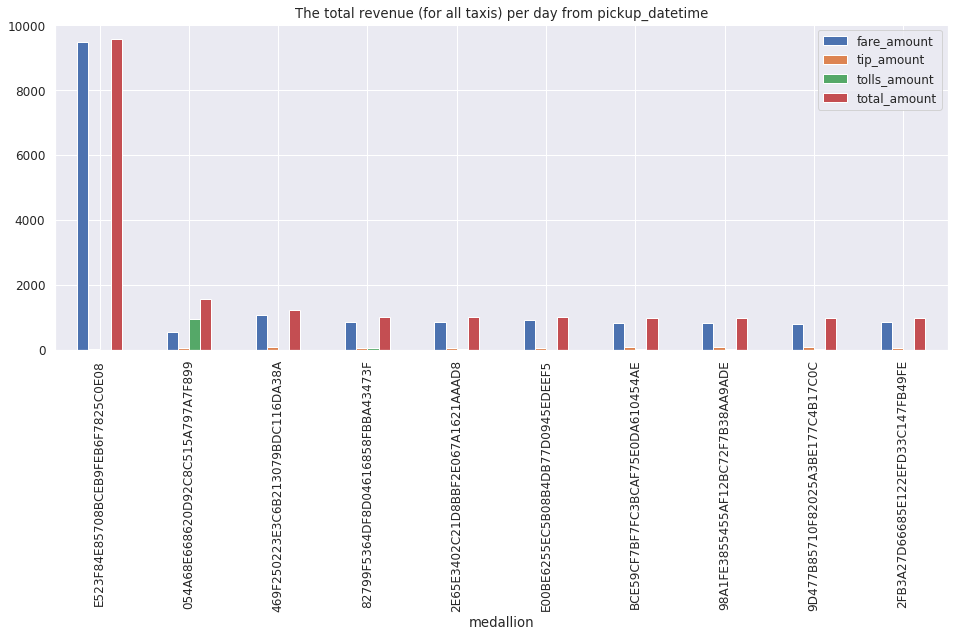

In [150]:
plot_revenue = task3d.head(10).groupby(['medallion']).sum().sort_values(['total_amount'], ascending=[False])
plot_revenue.plot.bar(figsize = (16, 6), title = 'The total revenue (for all taxis) per day from pickup_datetime')

# Task 2.5
Find the total number of trips for each taxi (medallion).
Output: A key-value pair per line, where the key is the medallion, and the value is the number of trips.
The output directory produced by Hadoop should be named MedallionTrips.

In [153]:
task2e = df_tf.groupby('medallion')['medallion'].count().to_frame('count').sort_values(['count'], ascending=[False])
task2e.head(10)

,count
medallion,
0305D9CCDEECC106EE7BC4FD453986C9,77
2FB3A27D66685E122EFD33C147FB49FE,75
D472ED56226A942830E174B6012A8C5A,75
56D722B77D7EF45080B91D6D4E7450DD,73
113D0572C45BFA1D44C96D25A5F7089F,72
7E1346F23960CC18D7D129FA28B63A75,72
2F9981E41303FD4674BD82D8FD855B46,72
A408F138216DE3E432BBF2FD88665A88,71
A994267F9554B8FE7BD2971162B85993,71


Text(0, 0.5, 'Count')

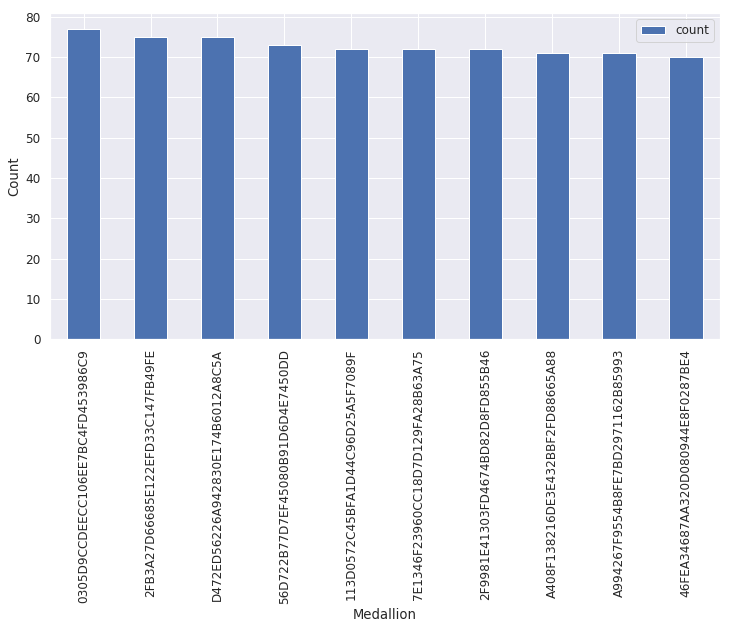

In [162]:
plot_medillion = task2e.head(10).plot(kind="bar", figsize=(12, 6))
plot_medillion.set_xlabel("Medallion")
plot_medillion.set_ylabel("Count")

# Task 2.6
Find the number of different taxis (medallion) used by each driver (license).
Output: A key-value pair per line, where the key is the driver, and the value is the number of different taxis used by that driver.
The output directory produced by Hadoop should be named UniqueTaxis.

In [165]:
df_tl = pd.merge(trips_sunday, licenses, how='inner', on='medallion')
df_tl.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,vehicle_type,model_year,medallion_type,agent_number,agent_name,agent_telephone_number,agent_website,agent_address,last_updated_date,last_updated_time
0,4B37DE7600AEF9C61F784B05FDEEE0E9,1D7E4CD01ED1C7A6E662A2A9A4B7153F,CMT,1,N,2013-08-04 00:03:59,2013-08-04 00:12:46,2,527,1.3,...,HYB,2014,NAMED DRIVER,325,ARTHUR CAB LEASING CORP.,(718)392-3013,NaN,25-11 41 AVENUE LIC NY 11101,1/31/2015,13:20
1,4B37DE7600AEF9C61F784B05FDEEE0E9,1D7E4CD01ED1C7A6E662A2A9A4B7153F,CMT,1,N,2013-08-04 00:46:36,2013-08-04 01:00:07,4,811,2.0,...,HYB,2014,NAMED DRIVER,325,ARTHUR CAB LEASING CORP.,(718)392-3013,NaN,25-11 41 AVENUE LIC NY 11101,1/31/2015,13:20
2,4B37DE7600AEF9C61F784B05FDEEE0E9,1D7E4CD01ED1C7A6E662A2A9A4B7153F,CMT,1,N,2013-08-04 03:28:21,2013-08-04 03:51:53,1,1412,11.1,...,HYB,2014,NAMED DRIVER,325,ARTHUR CAB LEASING CORP.,(718)392-3013,NaN,25-11 41 AVENUE LIC NY 11101,1/31/2015,13:20
3,4B37DE7600AEF9C61F784B05FDEEE0E9,1D7E4CD01ED1C7A6E662A2A9A4B7153F,CMT,1,N,2013-08-04 03:57:43,2013-08-04 04:09:18,1,694,5.0,...,HYB,2014,NAMED DRIVER,325,ARTHUR CAB LEASING CORP.,(718)392-3013,NaN,25-11 41 AVENUE LIC NY 11101,1/31/2015,13:20
4,4B37DE7600AEF9C61F784B05FDEEE0E9,1D7E4CD01ED1C7A6E662A2A9A4B7153F,CMT,1,N,2013-08-04 00:36:18,2013-08-04 00:45:44,1,566,1.5,...,HYB,2014,NAMED DRIVER,325,ARTHUR CAB LEASING CORP.,(718)392-3013,NaN,25-11 41 AVENUE LIC NY 11101,1/31/2015,13:20


In [168]:
task2f = df_tl.groupby('medallion')['vehicle_type'].count().to_frame('count').sort_values(['count'], ascending=[False])
task2f.head(10)

,count
medallion,
0305D9CCDEECC106EE7BC4FD453986C9,77
2FB3A27D66685E122EFD33C147FB49FE,75
D472ED56226A942830E174B6012A8C5A,75
56D722B77D7EF45080B91D6D4E7450DD,73
113D0572C45BFA1D44C96D25A5F7089F,72
7E1346F23960CC18D7D129FA28B63A75,72
2F9981E41303FD4674BD82D8FD855B46,72
A408F138216DE3E432BBF2FD88665A88,71
A994267F9554B8FE7BD2971162B85993,71
